<a href="https://colab.research.google.com/github/PatriciaSchmidt/AmplitudesTutorial/blob/main/Amplitudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This notebook is a collection of (modified) examples curated from several sources:
 * 2023 Gravitational Wave Open Data Workshop: https://github.com/gw-odw/odw-2023/tree/main/Tutorials
 * GWpy docs: https://gwpy.github.io/docs/stable/
 * PyCBC docs: https://pycbc.org/pycbc/latest/html/
 * LALSuite docs: https://lscsoft.docs.ligo.org/lalsuite/lalsuite/index.html
 * Bilby docs: https://lscsoft.docs.ligo.org/bilby/index.html

In [1]:
# We first need to install a few specific code packages:

! pip install -q gwpy==3.0.5

! pip install -q pycbc==2.2.1 lalsuite==7.19

! pip install -q bilby==2.1.2 dynesty==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## **GW Data**

## Accessing GW data

In [3]:
import gwpy
from gwpy.timeseries import TimeSeries

from gwosc.datasets import event_gps

In [4]:
# Let's retrieve the time and data of the first GW observation:
gps = event_gps('GW150914')
print("The GPS time of GW150914:", gps)

The GPS time of GW150914: 1126259462.4


In [5]:
ldata = TimeSeries.fetch_open_data('L1', int(gps)-8, int(gps)+8, cache=True)
print("LIGO Livingston strain data of GW150914")
print(ldata)

LIGO Livingston strain data of GW150914
TimeSeries([-7.20738533e-19, -7.69656935e-19, -8.34550390e-19,
            ..., -7.04042575e-19, -7.10036229e-19,
            -7.12193709e-19]
           unit: dimensionless,
           t0: 1126259454.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [6]:
hdata = TimeSeries.fetch_open_data('H1', int(gps)-8, int(gps)+8, cache=True)
print("LIGO Hanford strain data of GW150914")
print(ldata)

LIGO Hanford strain data of GW150914
TimeSeries([-7.20738533e-19, -7.69656935e-19, -8.34550390e-19,
            ..., -7.04042575e-19, -7.10036229e-19,
            -7.12193709e-19]
           unit: dimensionless,
           t0: 1126259454.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


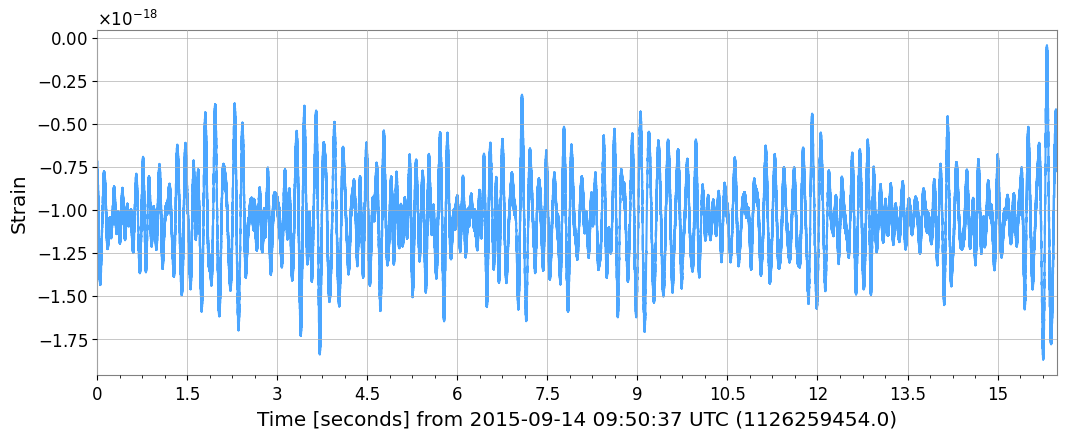

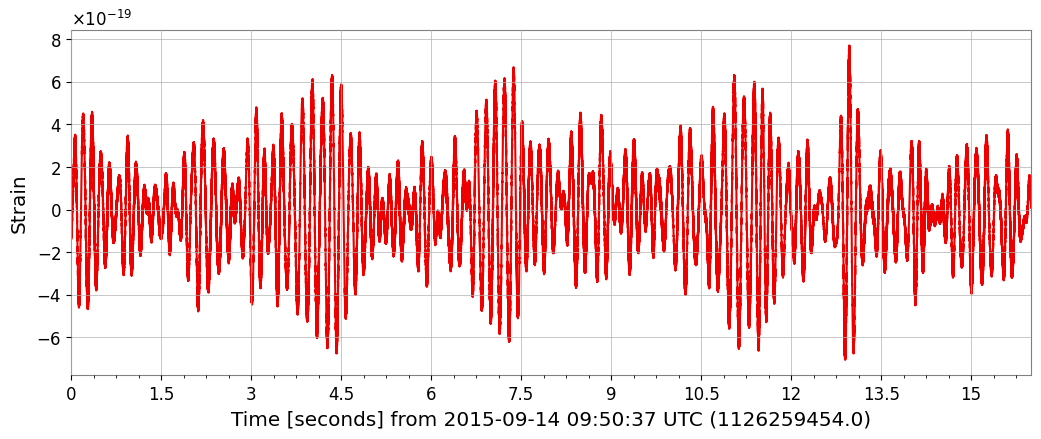

In [7]:
# Let's look at the data:

plotl = ldata.plot(figsize=(12, 4.8), ylabel='Strain', color='gwpy:ligo-livingston')
plotl.show()

ploth = hdata.plot(figsize=(12, 4.8), ylabel='Strain', color='gwpy:ligo-hanford')
ploth.show()

## Generating a spectrogram of GW data

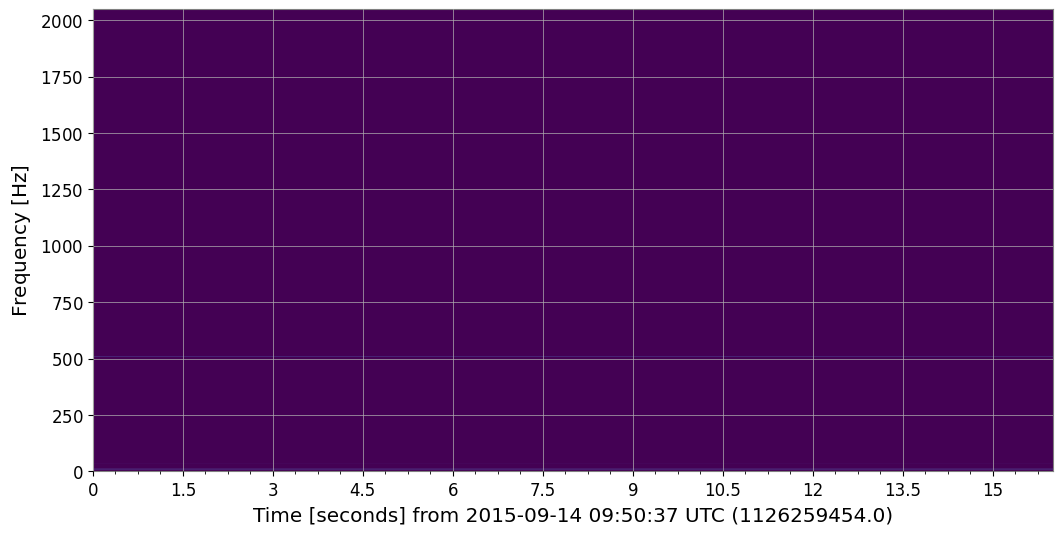

In [8]:
# A spectrogram allows us to track the frequency evolution of the strain data over time
# NOTE: A spectrogram returns the power per bin - we take the square root to obtain the familar amplitude spectrum

specgram = ldata.spectrogram2(fftlength=16, overlap=8, window='hann') ** (1/2.)
plot = specgram.plot();

In [9]:
print(specgram.min(), specgram.max())

1.3480104216816901e-27 1 / Hz(1/2) 2.3111413683962574e-19 1 / Hz(1/2)


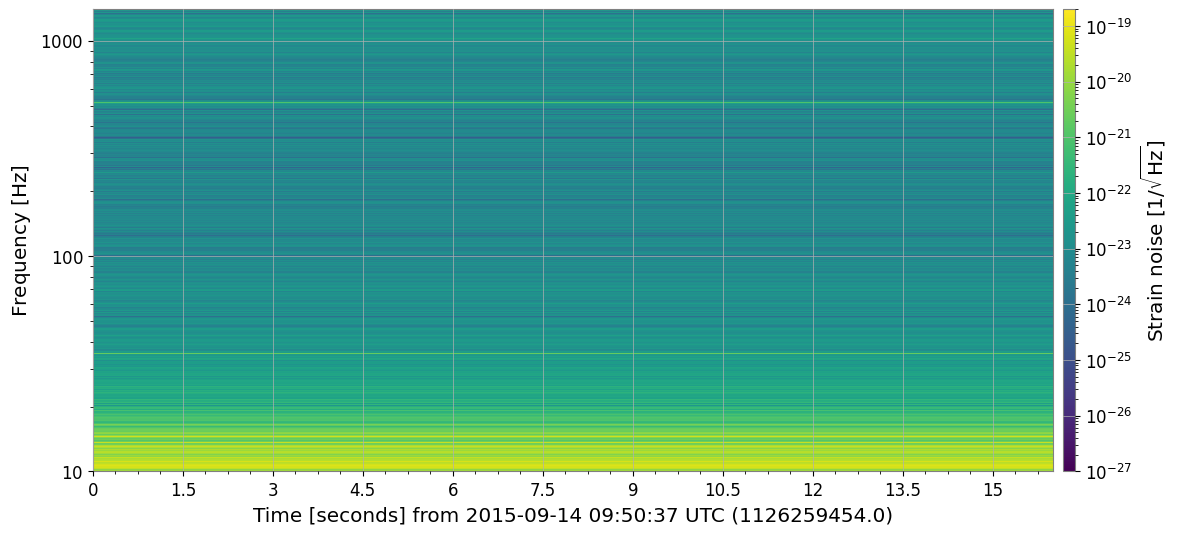

In [10]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-27, 2e-19),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

## Q-transform

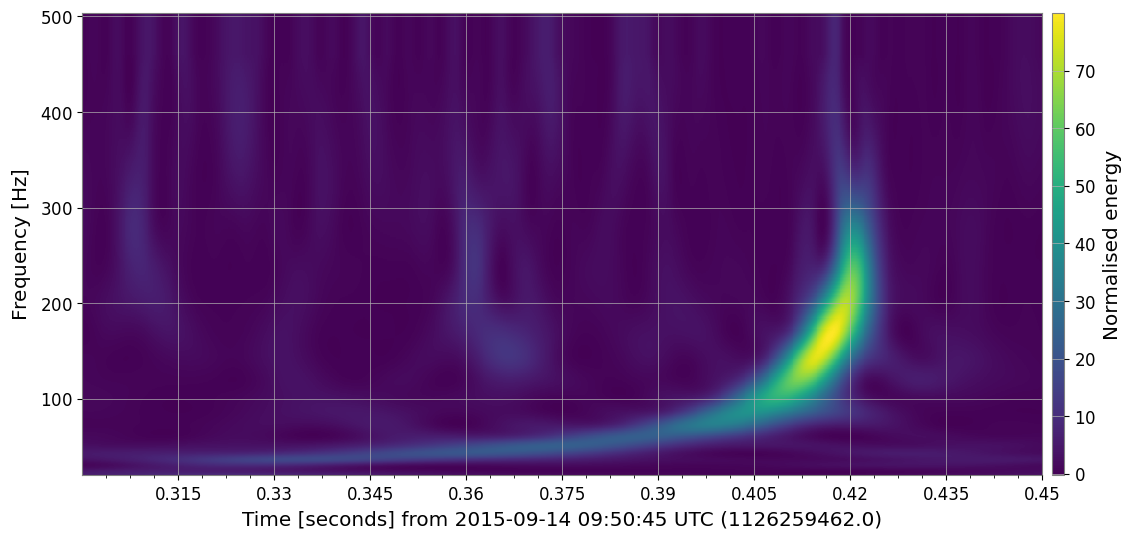

In [ ]:
ldataq = ldata.q_transform(frange=(20, 500), gps=gps, logf=True, outseg=(gps-0.1,gps+0.05))
plot = ldataq.plot()
plot.colorbar(label="Normalised energy");

## PSD Generation

In [ ]:
lasd = ldata.asd(fftlength=8, overlap=2, window='tukey', method='median')
hasd = hdata.asd(fftlength=8, overlap=2, window='tukey', method='median')

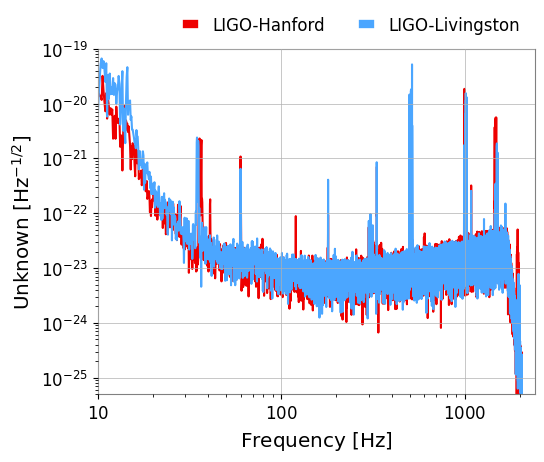

In [ ]:
plot = hasd.plot(label='LIGO-Hanford', color='gwpy:ligo-hanford');
ax = plot.gca();
ax.plot(lasd, label='LIGO-Livingston', color='gwpy:ligo-livingston');
ax.set_xlim(10, 2400);
ax.set_ylim(5e-26, 1e-19);
ax.legend(frameon=False, bbox_to_anchor=(1., 1.), loc='lower right', ncol=2);

# **Waveforms**

In this section, we demonstrate how to generate the waveform of a compact binary via PyCBC, which provides a highly accessible Python interface to lalsimulation.

In [11]:
import pycbc
from pycbc.waveform import get_td_waveform, get_fd_waveform, td_approximants, fd_approximants

In [12]:
# List of time domain approximants that are available
print('Time domain waveforms: ', td_approximants())

# List of frequency domain approximants that are currently available
print('Frequency domain waveforms: ', fd_approximants())

Time domain waveforms:  ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidal

In [ ]:
# Let's first generate the h+ and hx polarisations of an equal mass BBH in the time domain
# NOTE: SEOBNRv4 models the (2,|2|) mode of BBHs with aligned spins

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                         mass1=30.,
                         mass2=30.,
                         spin1z=-0.2,
                         spin2z=0.5,
                         delta_t=1/4096.,
                         inclination=0.0,
                         f_lower=20.)

In [13]:
get_td_waveform?

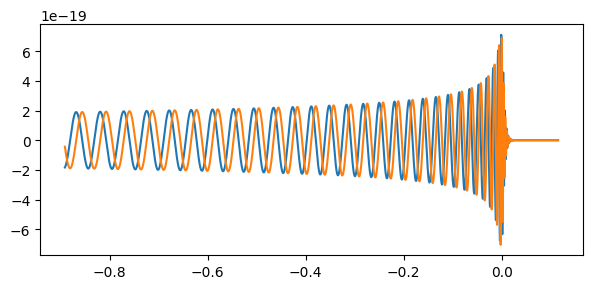

In [ ]:
plt.figure(figsize=(7,3));
plt.plot(hp.sample_times, hp);
plt.plot(hc.sample_times, hc);

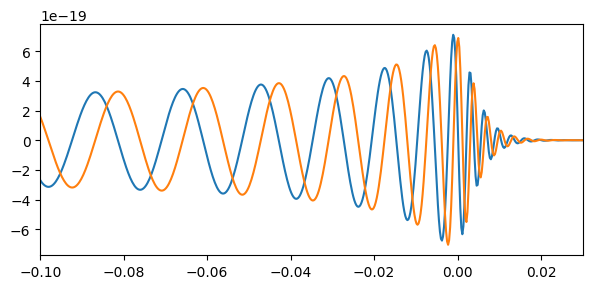

In [ ]:
# Let's zoom in at the merger
plt.figure(figsize=(7,3));
plt.plot(hp.sample_times, hp);
plt.plot(hc.sample_times, hc);
plt.xlim(-0.1, 0.03);

In [ ]:
# Let's now generate the h+ and hx polarisations of the same equal mass BBH in the frequency domain
# NOTE: IMRPhenomXAS models the (2,|2|) of BBHs with aligned spins

hpf, hcf = get_fd_waveform(approximant='IMRPhenomXAS',
                         mass1=30.,
                         mass2=30.,
                         spin1z=-0.2,
                         spin2z=0.5,
                         delta_f=1/4.,
                         inclination=0.0,
                         f_lower=20.)

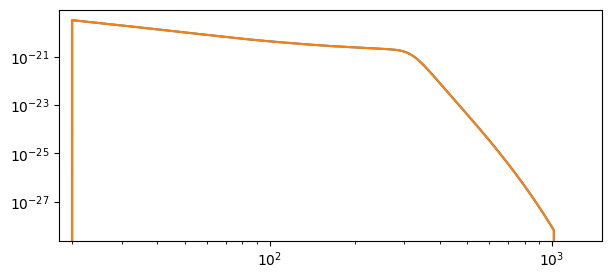

In [ ]:
plt.figure(figsize=(7,3));
plt.loglog(hpf.sample_frequencies, abs(hpf));
plt.loglog(hcf.sample_frequencies, abs(hcf));
plt.xlim(18.,1500.);

In [ ]:
# Let's now introduce spin precession.
# NOTE: IMRPhenomXP models the (2,|2|) modes of BBHs with arbitrarily oriented spins (precessing)

hpfP, hcfP = get_fd_waveform(approximant='IMRPhenomXP',
                         mass1=30.,
                         mass2=10.,
                         spin1x=0.7,
                         spin1y=0.0,
                         spin1z=-0.2,
                         spin2x=-0.4,
                         spin2y=0.0,
                         spin2z=0.5,
                         delta_f=1/4.,
                         inclination=np.deg2rad(76.),
                         f_lower=20.)

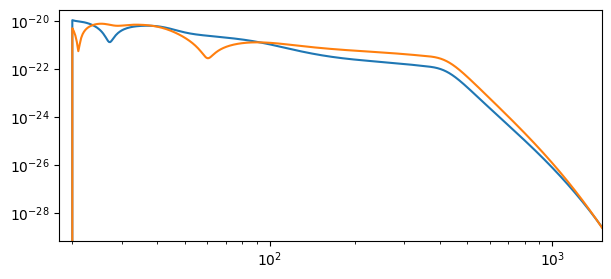

In [ ]:
plt.figure(figsize=(7,3));
plt.loglog(hpfP.sample_frequencies, abs(hpfP));
plt.loglog(hcfP.sample_frequencies, abs(hcfP));
plt.xlim(18.,1500.);

In [51]:
# How does this waveform look in the time domain?

hpP, hcP = get_td_waveform(approximant='IMRPhenomXP',
                         mass1=30.,
                         mass2=10.,
                         spin1x=0.7,
                         spin1y=0.0,
                         spin1z=-0.2,
                         spin2x=-0.4,
                         spin2y=0.0,
                         spin2z=0.5,
                         delta_t=1/4096.,
                         inclination=np.deg2rad(76.),
                         f_lower=20.)



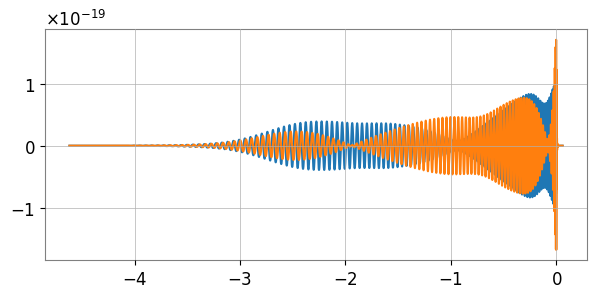

In [52]:
plt.figure(figsize=(7,3));
plt.plot(hpP.sample_times, hpP);
plt.plot(hcP.sample_times, hcP);

In [53]:
# Projecting a waveform onto a GW detector, e.g. LIGO Hanford
# To do this, we need to import the detector module in pycbc, which allows us to access the antenna pattern of a specific detector

from pycbc.detector import Detector

# We first initialise the detector:
detH = Detector("H1")

# Next we compute the antenna pattern weight for each detector, which depends on the sky locations (RA, DEC), the polarisation angle and the gps time.
# NOTE: In this example I am using the gps time of GW150914 (as defined before), but you can use any time you want, and I picked arbitrary values for
# the sky location and polarisation angle

ra   = 1.7  # right ascension
dec  = 0.6  # declination
pol  = 0.56  # polarisation angle

fpH, fcH = detH.antenna_pattern(ra, dec, pol, gps)
print("Hanford: fp={}, fc={}".format(fpH, fcH))

Hanford: fp=-0.5617882242203172, fc=0.2428317635324794


In [56]:
# The waveforms are constructed such that their peak occurs at t=0 (see above), hence we shift the time array to match our gps time:
hpP.start_time += gps
hcP.start_time += gps

# We now construct the strain measured in each detector by convolving the polarisations with the antenna patterns
htH = fpH * hpP + fcH * hcP

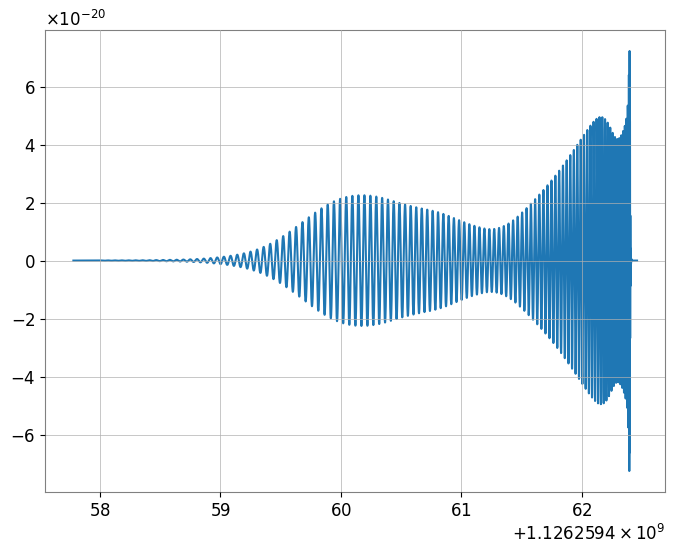

In [57]:
# Let's plot the associated strain observed in Hanford (zero noise):

plt.figure(figsize=(8,6));
plt.plot(htH.sample_times, htH.data);

# **Parameter Estimation**

In [14]:
import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

## Example: GW150914

In [15]:
# The first step in the analysis is to set up our detector network by initialising the (empty) detector objects

H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [16]:
# Load the data you want to analyse
# First, we define the times we want to analyse relative to the time of the event

post_trigger_duration = 2.0
duration = 4.0
analysis_start = gps + post_trigger_duration - duration

# Use gwpy to fetch the open data (the same as we did before)
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)


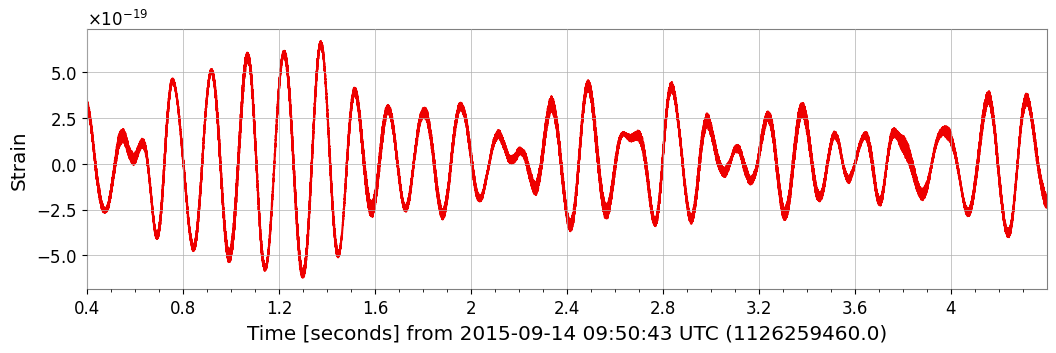

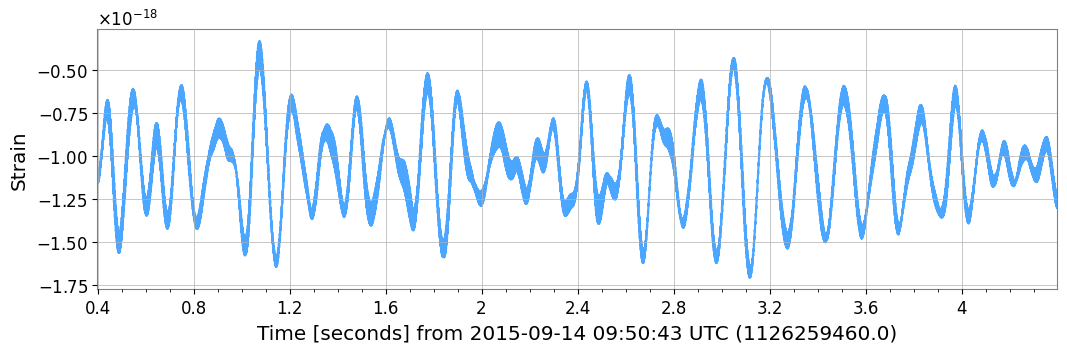

In [ ]:
# Let's visualise the stretch of data we will be analysing

H1_analysis_data.plot(ylabel='Strain', color='gwpy:ligo-hanford');
L1_analysis_data.plot(ylabel='Strain', color='gwpy:ligo-livingston');

In [17]:
# We now pass the strain data we want to analyse to the interferometer objects

H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)
L1.set_strain_data_from_gwpy_timeseries(L1_analysis_data)

In [18]:
# Next we generate the noise power spectral density using the Welch method as implemented in gwpy
# This requires us to download a longer stretch of data than the data we analyse

psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

L1_psd_data = TimeSeries.fetch_open_data(
    "L1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)


In [19]:
# We use gwpy to generate the PSD

psd_alpha = 2.0 * H1.strain_data.roll_off / duration

H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [20]:
# Now that we have the PSD, we store it in our interferometer objects

H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)

L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

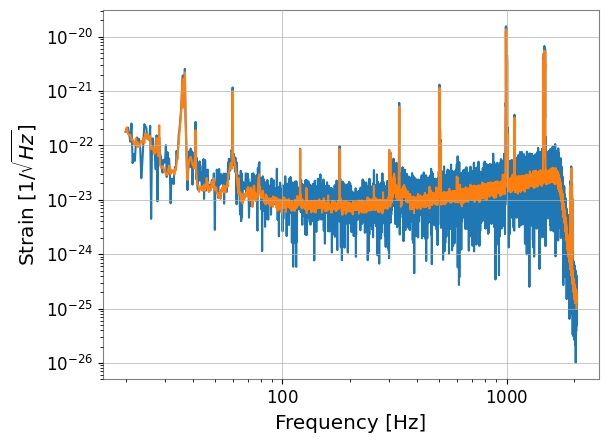

In [21]:
# Let's visualise the strain data and the amplitude spectral density (ASD) = \sqrt(PSD)

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [1/$\sqrt{Hz}$]")
plt.show()

In [23]:
# Next we set up a prior for the analysis

prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=gps-0.1, maximum=gps+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000, unit='Mpc', latex_label='$d_L$')

In [24]:
# The next step is to set up the likelihood object that evaluates the likelihood between some waveform model (template)
# and the strain data we are analysing

# First, we set up the list of interferometers we want to include in the likelihood calculation
interferometers = [H1, L1]

# Next we need set up the waveform generator that specifies our templates
# NOTE: LALSimulation is called
waveform_arguments = dict(
    waveform_approximant='IMRPhenomXP', reference_frequency=100., catch_waveform_errors=True)

# We now create the waveform_generator object. This also takes care of converting between parameters etc.
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, we create the likelihood using the GravitationalWaveTransient class
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=True)

13:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:16 bilby INFO    : Distance marginalisation file .distance_marginalization_lookup.npz does not exist
13:16 bilby INFO    : Building lookup table for distance marginalisation.


  0%|          | 0/400 [00:00<?, ?it/s]

In [25]:
# Let's get sampling!

result_short = bilby.run_sampler(
    likelihood,
    prior,
    sampler='dynesty',
    outdir='short',
    label="GW150914",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    nlive=250,
    dlogz=1.,  # <- Arguments are used to make things fast but are not recommended for general use!
    clean=True,
)


13:20 bilby INFO    : Running for label 'GW150914', output will be saved to 'short'
13:20 bilby INFO    : Using lal version 7.3.1
13:20 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
13:20 bilby INFO    : Using lalsimulation version 5.2.1
13:20 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
13:20 bilby INFO    : Analysis priors:
13:20 bilby INFO    : chirp_mass=Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
13:20 bilby INFO    : mass_ratio=Uniform(mi

1it [00:00, ?it/s]

13:28 bilby INFO    : Written checkpoint file short/GW150914_resume.pickle
13:28 bilby INFO    : Rejection sampling nested samples to obtain 275 posterior samples
13:28 bilby INFO    : Sampling time: 0:06:59.778450
13:28 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/275 [00:00<?, ?it/s]

13:30 bilby INFO    : Summary of results:
nsamples: 275
ln_noise_evidence: -17273.289
ln_evidence: -16988.719 +/-  0.205
ln_bayes_factor: 284.569 +/-  0.205



In [ ]:
# The posterior samples are stored as panda data frames
result_short.posterior.keys()

Index(['chirp_mass', 'mass_ratio', 'time_jitter', 'phase', 'geocent_time',
       'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'dec', 'ra',
       'theta_jn', 'psi', 'luminosity_distance', 'log_likelihood', 'log_prior',
       'reference_frequency', 'waveform_approximant', 'minimum_frequency',
       'total_mass', 'mass_1', 'mass_2', 'H1_log_likelihood',
       'L1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr',
       'L1_matched_filter_snr', 'L1_optimal_snr', 'symmetric_mass_ratio',
       'iota', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y',
       'spin_2z', 'phi_1', 'phi_2', 'chi_eff', 'chi_1_in_plane',
       'chi_2_in_plane', 'chi_p', 'cos_tilt_1', 'cos_tilt_2', 'redshift',
       'comoving_distance', 'mass_1_source', 'mass_2_source',
       'chirp_mass_source', 'total_mass_source'],
      dtype='object')

In [ ]:
result_short.posterior


,chirp_mass,mass_ratio,time_jitter,phase,geocent_time,a_1,a_2,tilt_1,tilt_2,phi_12,...,chi_2_in_plane,chi_p,cos_tilt_1,cos_tilt_2,redshift,comoving_distance,mass_1_source,mass_2_source,chirp_mass_source,total_mass_source
0,30.041780,0.678949,0.000193,4.772367,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.057951,252.989373,39.734253,26.977545,28.396182,66.711798
1,31.238189,0.685616,0.000193,1.434140,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.061753,269.337517,40.960552,28.083197,29.421346,69.043750
2,30.412950,0.855448,-0.000030,1.701641,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.062887,274.212013,35.558618,30.418556,28.613523,65.977174
3,31.648187,0.832879,-0.000155,4.432020,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.067966,295.994195,37.330947,31.092173,29.634082,68.423119
4,31.624233,0.812773,0.000009,1.259722,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.067564,294.271714,37.784460,30.710199,29.622804,68.494659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,31.033515,0.957777,-0.000013,4.675572,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.061848,269.748921,34.305405,32.856921,29.225941,67.162326
282,31.036862,0.974922,-0.000015,4.706293,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.062378,272.023972,33.988091,33.135752,29.214523,67.123843
283,31.112913,0.975535,-0.000102,4.551431,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.064594,281.539318,33.989729,33.158184,29.225137,67.147913
284,31.038179,0.966670,-0.000041,4.787304,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.064426,280.817374,34.069051,32.933541,29.159546,67.002592


In [ ]:
Mtot = result_short.posterior["total_mass"].values

In [ ]:
# Compute the 90% credible interval and the median of the distribution:

lower_bound = np.quantile(Mtot, 0.05)
upper_bound = np.quantile(Mtot, 0.95)
median = np.quantile(Mtot, 0.5)
print("Mtot = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))


Mtot = 71.54973065731639 with a 90% C.I = 70.7255397939141 -> 72.54636959641927


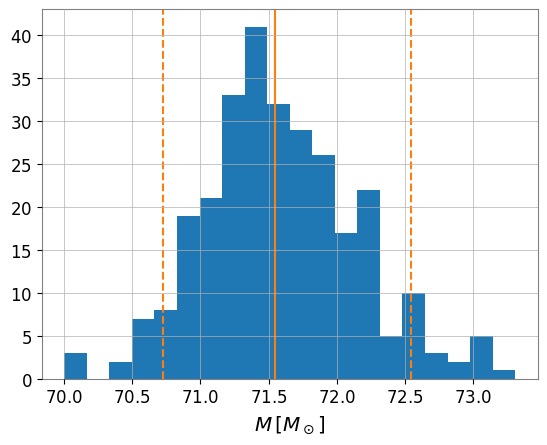

In [ ]:
plt.hist(result_short.posterior["total_mass"], bins=20);
plt.axvline(lower_bound, ls='--', color='C1');
plt.axvline(upper_bound, ls='--', color='C1');
plt.axvline(median, color='C1');
plt.xlabel(r'$M\, [M_\odot]$');

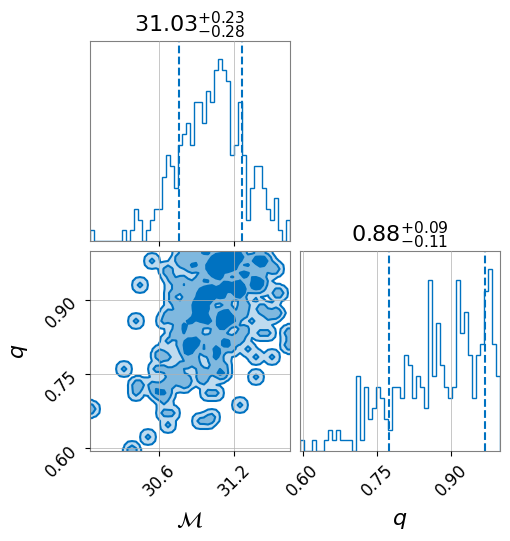

In [ ]:
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True)